# EDA

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
data = pd.read_csv("Zoo.csv")

In [34]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [36]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

### Numerical Features

In [37]:
features = data.columns.to_list()

In [38]:
features

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [39]:
features.remove('animal name')

In [40]:
features

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

### Data visulization

### Histogram

In [41]:
def create_histograms(data, features, figsize=(20, 12)):
    """
    Plots histograms with KDE (Kernel Density Estimation) for the given numerical features.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to plot.
        figsize (tuple): Figure size for the overall plot (default is (20, 12)).
    
    Returns:
        None: Displays the histograms with KDE.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Distribution of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.histplot(data=data, x=feature, kde=True, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        mean_val, median_val = data[feature].mean(), data[feature].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.set_title(f'{feature} Distribution', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.legend(fontsize=10)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

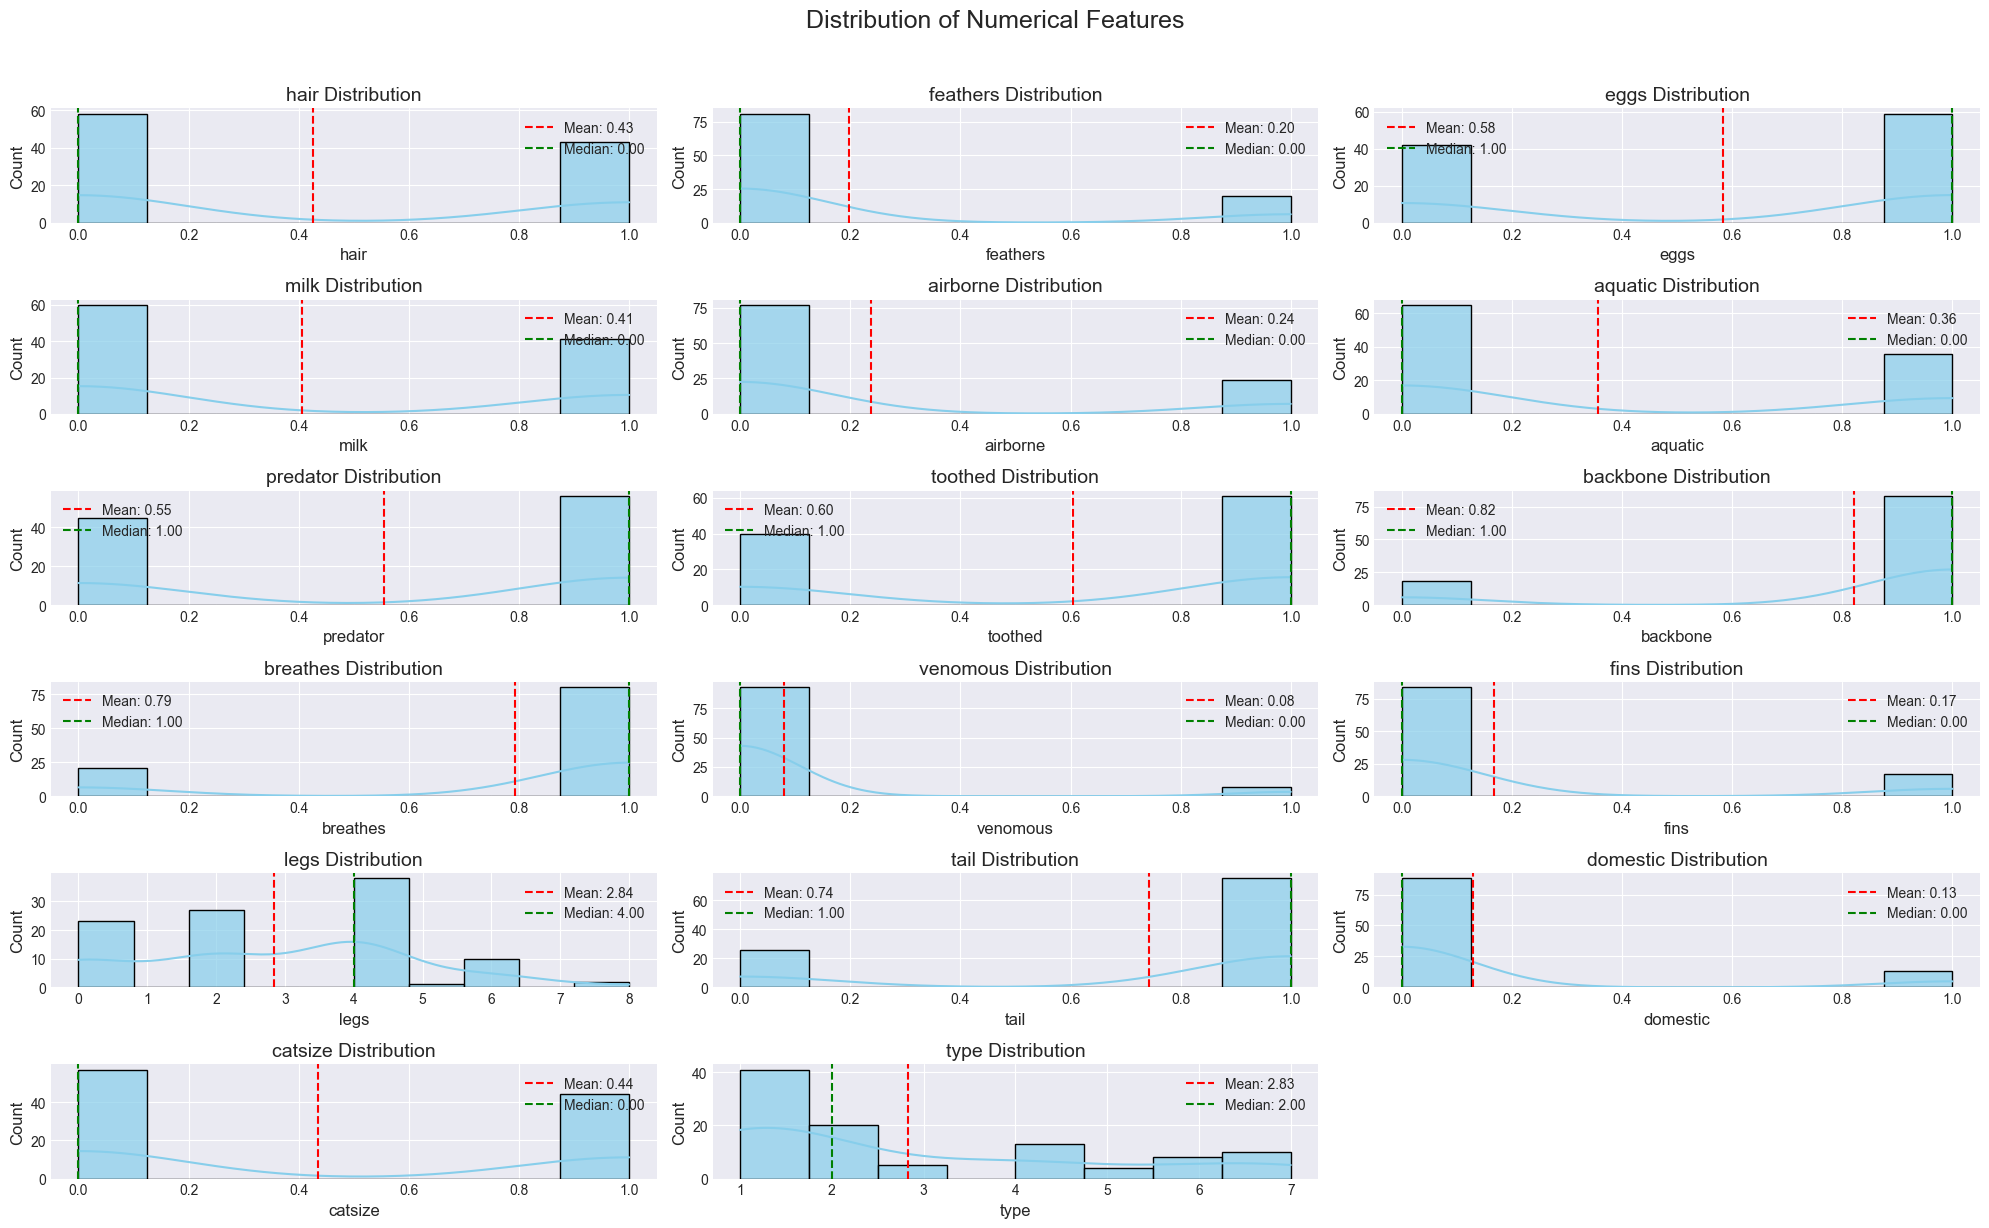

In [42]:
create_histograms(data= data,
                  features= features)

### Box Plot

In [43]:
def create_box_plots(data, features, figsize=(20, 12)):
    """
    Plots box plots for the given numerical features to visualize their distributions and outliers.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to plot.
        figsize (tuple): Figure size for the overall plot (default is (20, 12)).
    
    Returns:
        None: Displays the box plots.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Box Plots of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.boxplot(data=data, x=feature, ax=ax, color='skyblue', linewidth=1)
        ax.set_title(f'{feature} Box Plot', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

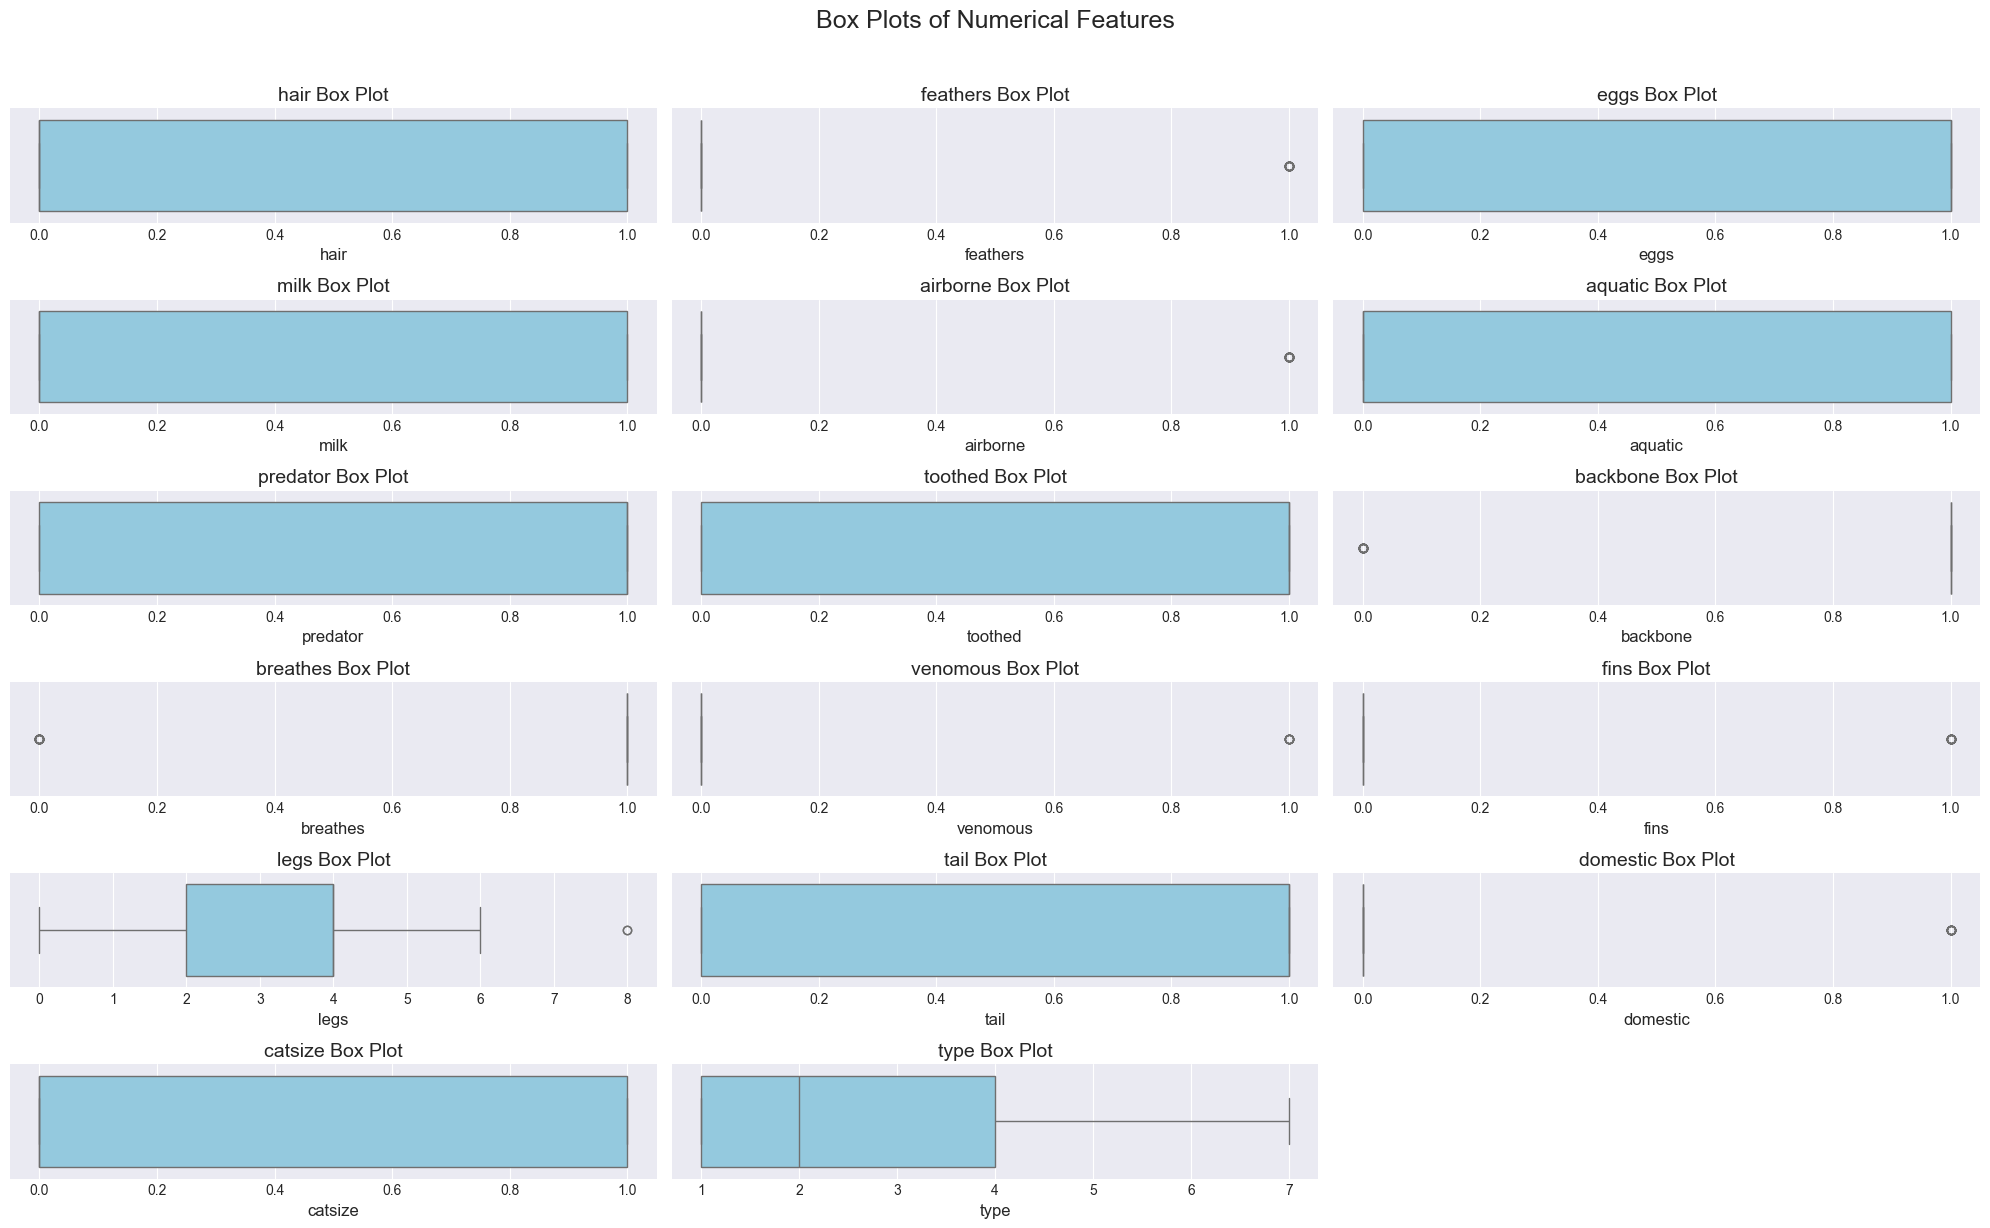

In [44]:
create_box_plots(data= data,
                 features= features)

### Heat map

In [45]:
def create_correlation_heatmap(data, features, figsize=(12, 10)):
    """
    Plots a correlation heatmap for the given numerical features to identify relationships between them.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to include in the heatmap.
        figsize (tuple): Figure size for the heatmap (default is (12, 10)).
    
    Returns:
        None: Displays the correlation heatmap.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    corr_matrix = data[features].corr()
    fig, ax = plt.subplots(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(
        corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
        square=True, linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 10}
    )
    plt.title('Correlation Heatmap of Numerical Features', fontsize=18, pad=20)

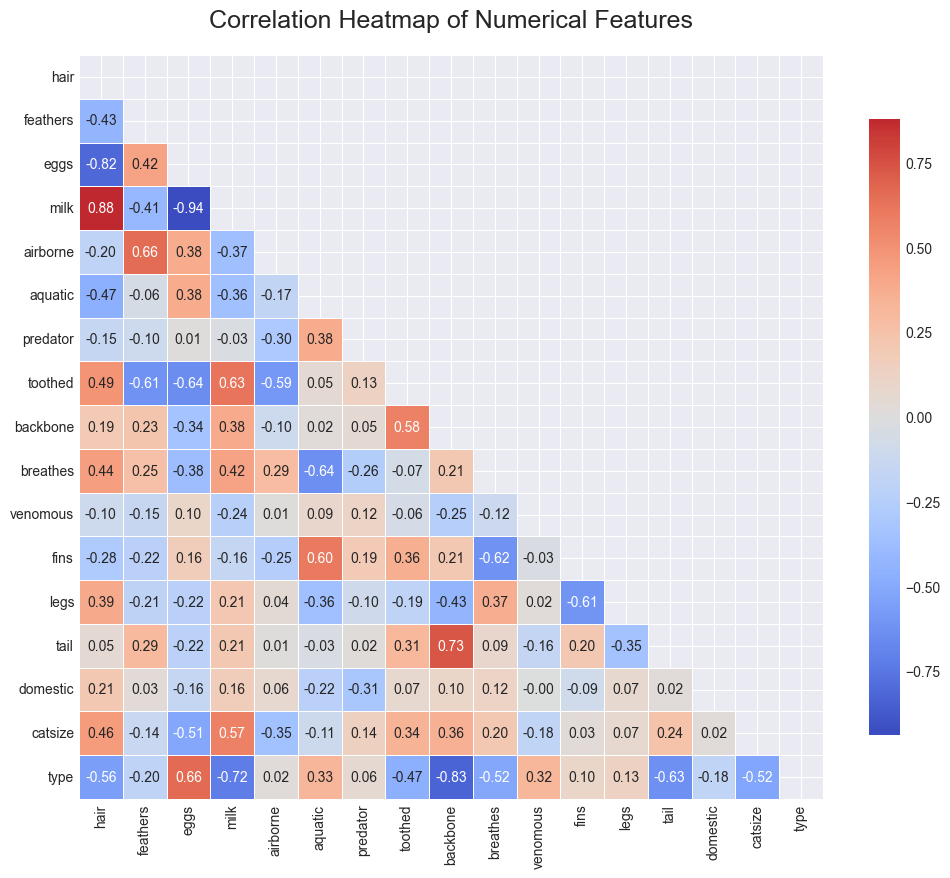

In [46]:
create_correlation_heatmap(data= data, features= features)

### Pair Plot

In [47]:
def create_pair_plot(data, features, hue=None):
    """
    Plots pair plots for the given numerical features to visualize pairwise relationships.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to include in the pair plot.
        hue (str): Column name for grouping data points by color (default is None).
    
    Returns:
        None: Displays the pair plots.
    """
    sns.pairplot(data=data[features + ([hue] if hue else [])], hue=hue, palette='tab10')
    plt.suptitle('Pair Plot of Numerical Features', fontsize=18, y=1.02)

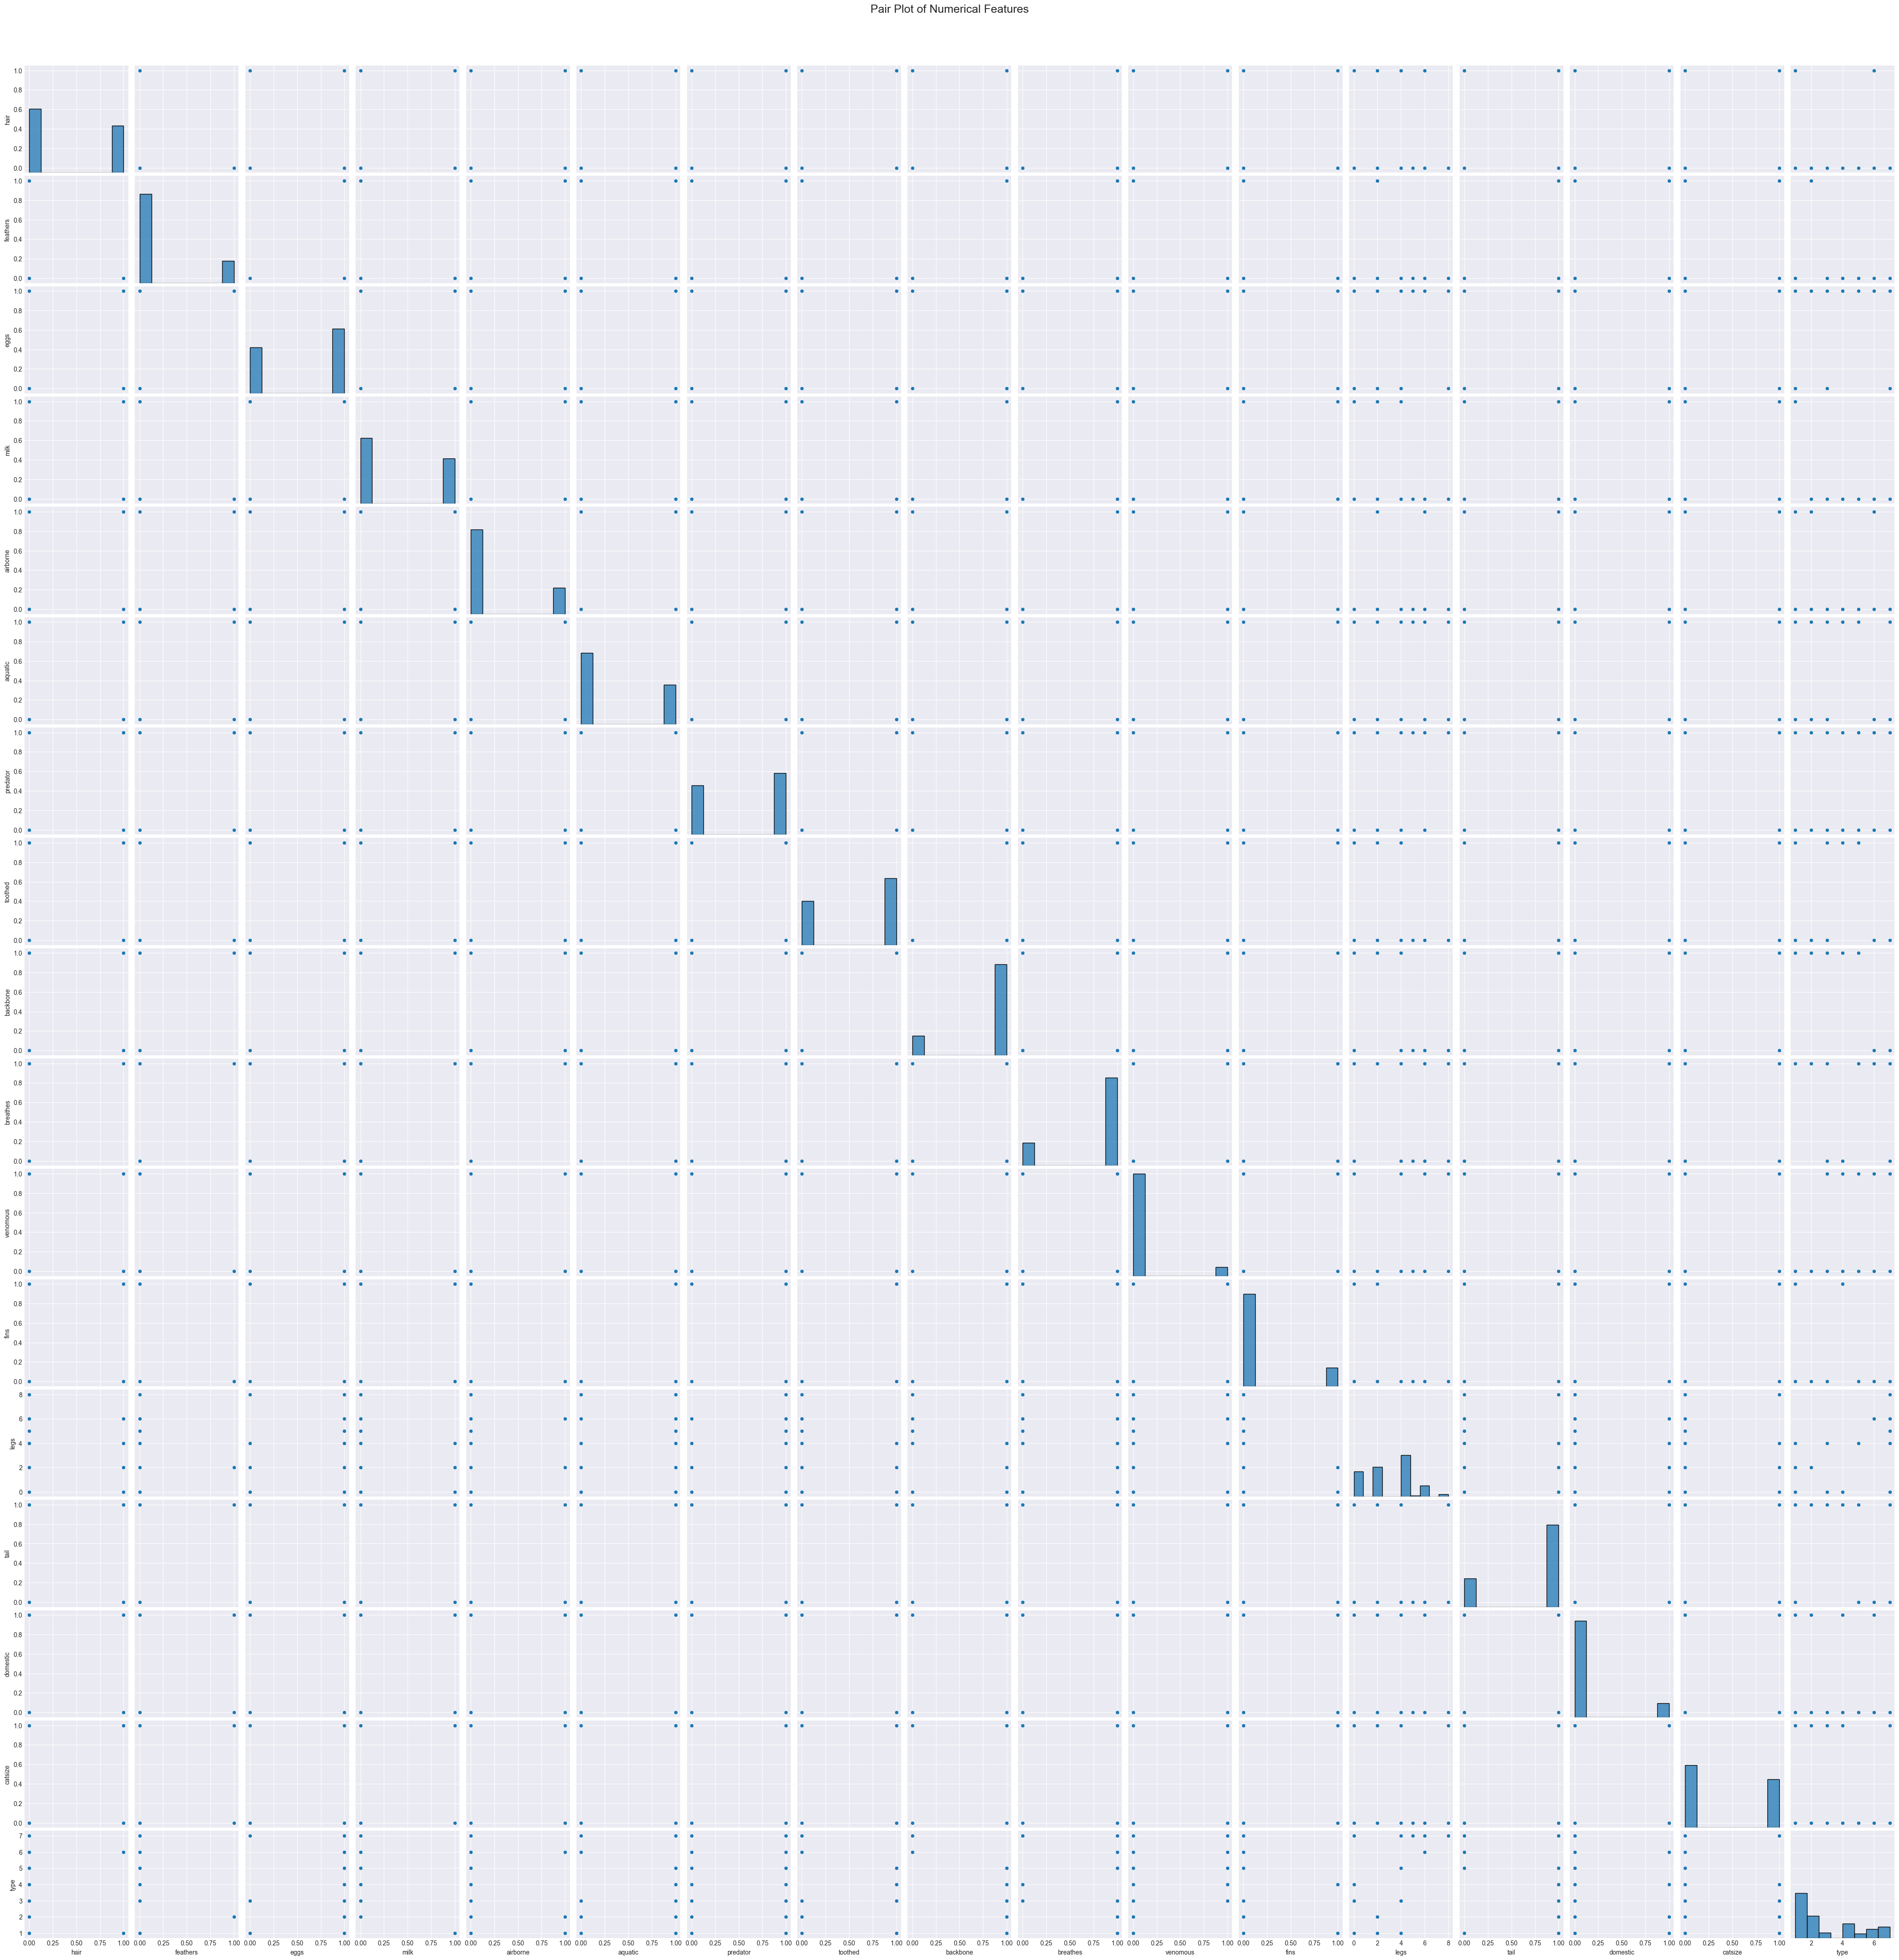

In [48]:
create_pair_plot(data= data, features= features)

### Data Cleaning

In [49]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


- animal name feature won't help us to determine the type 
- so we will drop it

In [50]:
data.drop('animal name', axis= 1 , inplace= True)

In [51]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [52]:
def save_cleaned_data(data, filename):
    """
    Saves the cleaned data to a specified file format (CSV by default).
    
    Parameters:
        data (pd.DataFrame): The cleaned data to be saved.
        filename (str): The name of the file to save the data.
        file_format (str): The format to save the data ('csv' or 'excel'). Default is 'csv'.
    
    Returns:
        None
    """
    data.to_csv(filename, index=False)
    print(f"Data saved successfully as {filename}.csv")

In [53]:
save_cleaned_data(data= data, filename= "cleaned_Zoo_data.csv")

Data saved successfully as cleaned_Zoo_data.csv.csv
